In [1]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import tensorflow as tf

from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
embedding_file = './data/GoogleNews-vectors-negative300.bin.gz'

In [5]:
%%time
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=200000)

CPU times: total: 3.2 s
Wall time: 3.22 s


In [6]:
pizza = word_vectors['pizza']
print(f'Vector dimension: {pizza.shape}')

print(pizza)

Vector dimension: (300,)
[-1.25976562e-01  2.53906250e-02  1.66992188e-01  5.50781250e-01
 -7.66601562e-02  1.28906250e-01  1.02539062e-01 -3.94821167e-04
  1.21582031e-01  4.32128906e-02  1.72851562e-01 -6.83593750e-02
  3.41796875e-01  8.39843750e-02  6.68945312e-02  2.67578125e-01
 -3.71093750e-02 -5.56640625e-02  1.80664062e-01  1.90429688e-02
 -5.07812500e-02  9.03320312e-03  1.76757812e-01  6.49414062e-02
 -6.25000000e-02 -9.42382812e-02 -9.71679688e-02  4.00390625e-01
  1.15234375e-01  1.02539062e-01 -1.86767578e-02 -2.69531250e-01
  1.80664062e-01  1.25000000e-01 -3.17382812e-02 -5.49316406e-02
  3.45703125e-01 -1.57470703e-02  1.82390213e-05  2.07031250e-01
 -1.25976562e-01 -2.83203125e-01  2.00195312e-01  8.34960938e-02
 -4.73632812e-02 -3.11279297e-02 -2.61718750e-01  1.69921875e-01
 -2.02636719e-02  1.53320312e-01 -1.20605469e-01  3.75000000e-01
 -5.68847656e-02 -4.76074219e-03 -1.95312500e-01 -2.03125000e-01
  3.00781250e-01 -1.01074219e-01 -3.18359375e-01 -9.03320312e-02


In [8]:
print(word_vectors.similarity('pizza', 'tomato'))
print(word_vectors.similarity('pizza', 'sauce'))
print(word_vectors.similarity('pizza', 'cheese'))

0.35505623
0.36959887
0.47083578


In [9]:
print(word_vectors.similarity('pizza', 'gorilla'))
print(word_vectors.similarity('pizza', 'tree'))
print(word_vectors.similarity('pizza', 'yoga'))

0.108518735
0.11185601
0.14119941


In [10]:
word_vectors.n_similarity("dog bites man".split(), "canine nips human".split())

0.5314661

In [11]:
word_vectors.n_similarity("martian dolphins are hostile".split(), "i flunked calligraphy school".split())

0.14505777

The downside to this approach is that the word order is throw out as seen in the example below

In [12]:
word_vectors.n_similarity("dog bites man".split(), "man bites dog".split())

1.0

In [13]:
s1 = "Volkswagen intends to double electric car sales in China".lower().split()
s2 = "First Toyota with solid state battery will be hybrid".lower().split()
word_vectors.n_similarity(s1, s2)

0.52682734

In [14]:
word_vectors.most_similar(positive=['cell'], topn=10)

[('cells', 0.8180485367774963),
 ('Cells', 0.6146953105926514),
 ('Cell', 0.5321314930915833),
 ('cellular', 0.5272858142852783),
 ('tumor_cells', 0.5097643136978149),
 ('ES_cells', 0.4866572618484497),
 ('immune_cells', 0.4831920266151428),
 ('epithelial_cells', 0.47818055748939514),
 ('molecule', 0.47757473587989807),
 ('proteins', 0.4749472737312317)]

In [15]:
word_vectors.most_similar(positive=['cell', 'phone'], topn=10)

[('cell_phone', 0.6861391067504883),
 ('cellular', 0.6757438778877258),
 ('cellphone', 0.6633196473121643),
 ('telephone', 0.6474039554595947),
 ('Phone', 0.605189323425293),
 ('phones', 0.5896332859992981),
 ('cells', 0.585094690322876),
 ('cordless_phone', 0.5711769461631775),
 ('Cell', 0.5617641806602478),
 ('landline', 0.5467296242713928)]

In [16]:
#This will pick out the word which seems to be odd
word_vectors.doesnt_match(["apple", "orange", "hamburger", "banana", "kiwi"])

'hamburger'

In [17]:
word_vectors.doesnt_match(["Microsoft", "Apple", "Toyota", "Amazon", "Netflix", "Google"])

'Toyota'

In [18]:
# To visualize word embedding we will be using PCA this will enable us to convert 300 dimension into 2 dimension and visualize it
def display_pca_scatterplot(model, words):

    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0] , twodim[:,1], edgecolors='k', c='r', s=128)
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

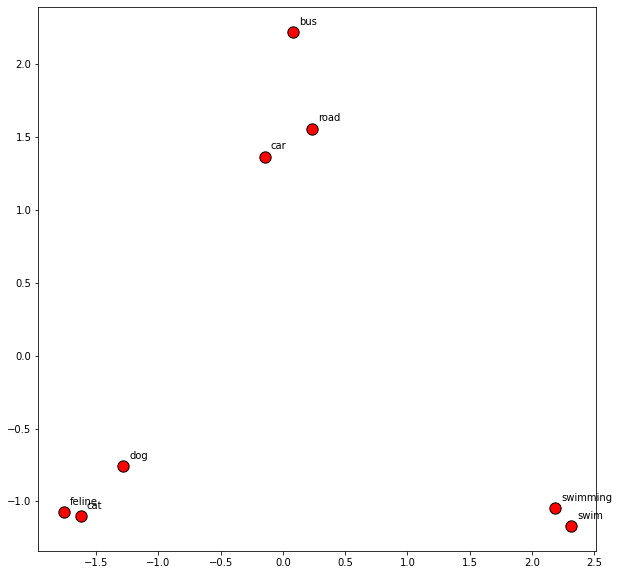

In [19]:
display_pca_scatterplot(word_vectors, ['swim', 'swimming', 'cat', 'dog', 'feline', 'road', 'car', 'bus'])

We can even solve analogies (to a limited extent) with vector arithmetic.<br><br>
Here, we're solving the analogy:<br>
Rome is to Italy as London is to __________.<br><br>
Arithmetically, this is Italy + London - Rome.


In [20]:
word_vectors.most_similar(positive=['Italy', 'London'], negative=['Rome'], topn=3)

[('UK', 0.6230568885803223),
 ('Britain', 0.6016390323638916),
 ('United_Kingdom', 0.534345805644989)]

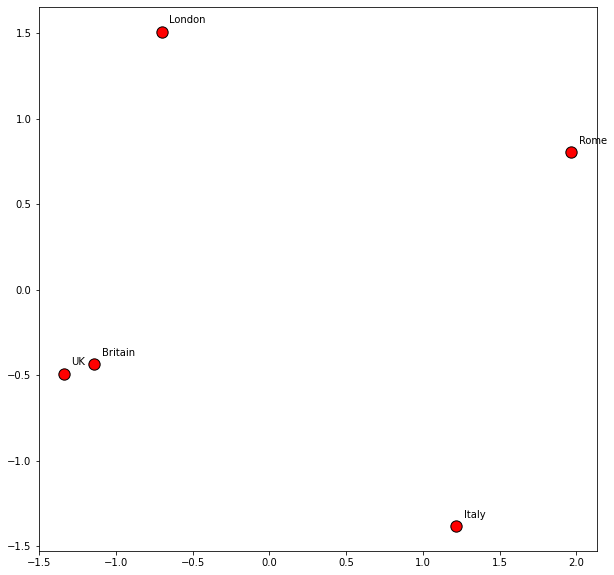

In [21]:
display_pca_scatterplot(word_vectors, ['Rome', 'Italy', 'London', 'Britain', 'UK'])

In [24]:
%%time
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=1000000)

CPU times: total: 16 s
Wall time: 16 s


In [25]:
yelp_train = pd.read_csv('./data/yelp_review_polarity_csv/train.csv', names=['sentiment', 'review'])
print(yelp_train.shape)

(560000, 2)


In [26]:
yelp_train.head()

,sentiment,review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [27]:
TRAIN_SIZE = 100000
yelp_train = yelp_train.sample(frac=1, random_state=1)[:TRAIN_SIZE].copy()
print(yelp_train.shape)

(100000, 2)


In [28]:
yelp_train['sentiment'].replace(to_replace=1, value=0, inplace=True)
yelp_train['sentiment'].replace(to_replace=2, value=1, inplace=True)

In [29]:
yelp_train.head()

,sentiment,review
39658,1,"omg, the grandma g's pizza with rosemary chick..."
330033,0,Microwaved food over over over seasoned gyro m...
238898,0,"While the food is good, the service leaves a l..."
453536,0,Called the Chandler PD about the sign spinner ...
555973,1,"Just took Ewok, my approx. 6 month old shih tz..."


In [30]:
yelp_train_split, yelp_val_split = train_test_split(yelp_train, train_size=0.85, random_state=1)

In [31]:
train_reviews = yelp_train_split['review']
y_train = np.array(yelp_train_split['sentiment'])

val_reviews = yelp_val_split['review']
y_val = np.array(yelp_val_split['sentiment'])

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [34]:
# Checking if our dataset is balanced or not
collections.Counter(y_train)

Counter({0: 42395, 1: 42605})

In [35]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=20000,
                                               filters='0123456789!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                                               lower=True)

In [36]:
%%time
tokenizer.fit_on_texts(train_reviews)

CPU times: total: 7.64 s
Wall time: 7.63 s


In [37]:
%%time
X_train = tokenizer.texts_to_sequences(train_reviews)

CPU times: total: 4.84 s
Wall time: 4.83 s


In [38]:
print(X_train[0]) # The words are converted to an index corresponding the word in the tokenizer

[49, 14, 2224, 4199, 1981, 11, 2312, 16, 6, 59, 3042, 138, 5, 145, 1, 294, 1, 378, 370, 7, 8, 37, 6, 1, 120, 944, 16362, 1026, 33, 3014, 21, 1170, 12144, 3036, 1427, 5513, 56, 3214, 2, 106, 5514, 136, 886, 1, 2224, 268, 3, 90, 22, 1278, 944, 16362, 51, 183, 36, 60, 107, 3214, 9, 14, 795, 26, 351, 3, 148, 5, 150, 107, 65, 12, 47, 74, 1966, 1935, 42, 7, 1, 132, 5352, 24, 1918, 36, 5481, 21, 1, 11637, 1378, 1116, 6722, 13, 64, 262, 19603, 2, 312, 4, 1253, 3278, 5, 14, 362, 116, 6, 10, 1, 128, 271, 137, 2100, 7, 16, 14, 362, 2, 3, 148, 4, 156, 1694, 1047, 17, 147, 86, 323, 598, 1, 1103, 207, 1055, 51, 544, 783, 21, 1, 3872, 15, 26, 147, 17728, 2, 27, 148, 39, 15, 102, 993, 18, 1, 1364, 55, 1, 6722, 5481, 2, 60, 39, 249, 102, 30, 282, 8, 161, 4, 43, 189, 46, 9, 944, 16362, 5, 1338, 65, 10, 674, 3, 102, 598, 2, 47, 64, 90, 279, 48, 64, 86, 124, 174, 1, 128, 18, 4, 545, 303, 1072, 13078, 12751, 17, 18, 1, 766, 13, 14, 362, 2, 3, 24, 282, 172, 360, 10, 815, 9, 107, 3, 78, 113, 39, 1, 5352, 24,

In [39]:
[tokenizer.index_word[x] for x in X_train[0][:3]]

['from', 'my', 'hospital']

In [41]:
tokenizer.sequences_to_texts([X_train[0]])

["from my hospital feedback form n nwhile this was an unpleasant experience to say the least the worst part of it all was the way dr haslett treated me doctors on previous shifts introduced themselves discussed their plans and said goodbye before leaving the hospital however i did not meet dr haslett or find out what her plans for my case were until i asked to see her which is when more trouble began one of the night nurses had pointed out activity on the baby's heart rate monitor that she found worrisome and gave a basic explanation to my husband who was in the room once made aware of this my husband and i asked a few further questions but still didn't quite understand the situation its possible or etc based on the answers we were still alarmed and so asked if we could speak with the doctor about the monitor activity and what if anything could be done it took a very long time for dr haslett to arrive which in itself i could understand and when she did show up she didn't come into the 

In [42]:
train_reviews.iloc[0][:300]

'From my hospital feedback form:\\n\\nWhile this was an unpleasant experience to say the least, the worst part of it all was the way Dr. Haslett treated me.  Doctors on previous shifts introduced themselves, discussed their plans and said goodbye before leaving the hospital.  However, I did not meet Dr'

Some models and situations require us to pad our sequences to the same length. While that's not the case here, it can still be beneficial to have all our inputs (and consequently, our batches) to be of uniform size to help with optimizations.

In [43]:
MAX_REVIEW_LEN = 200
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=MAX_REVIEW_LEN)

In [44]:
print(X_train[0])
print(X_train[1])

[ 1037   957     2   356    36   184   267    13    24   576    21    13
   132    73    47   944 16362   102    22   141     7     1   238    64
     6  5990     5     2    24     5    30  1743     7    75     1  5352
   184   267    64    24   106    28   238     3   278   102    23  2902
    17    22    13    22    10     4    31     3    24    68  2489     3
   102   494  8000    49     3    24    91   538  6781   136     2     3
     6    22   828     9     1 13837     7  3942     3     6   142    49
     1    46     3    24   419    25     1  2224     5   121     2  2019
     5   429   238   694    17   118   102   477  2019    80   169  1026
    38    13     1     7  3442    28  1248   227    10  1427    17    80
   376    59  5112    18   944 16362     3     6   531  5381    36    55
   169  4867     5    10   376     4   120     2    37     3   102    99
   141    55     6     1 15231     7  3942    64   161   226    14   803
     9     4   893     2  3308    33    27   103 15

In [45]:
X_val = tokenizer.texts_to_sequences(val_reviews)
X_val = keras.preprocessing.sequence.pad_sequences(X_val, maxlen=MAX_REVIEW_LEN)

We need to get the word vector from gensim into keras

In [46]:
print(tokenizer.word_index['good'])

34


In [47]:
print(word_vectors['good'][:50])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891]


In [50]:
num_tokens = len(tokenizer.word_index) + 1

embedding_dim = 300
embedding_matrix = np.zeros((num_tokens, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word_vectors.has_index_for(word):
        embedding_matrix[i] = word_vectors[word].copy()

In [51]:
print(embedding_matrix[tokenizer.word_index['good']][:50])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891]


In [52]:
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    input_length=MAX_REVIEW_LEN,
    trainable=True
)

In [53]:
tf.random.set_seed(0)

model = keras.Sequential()

# This layer will output a sequence of 300-dimension *vectors*, one for each element in the input sequence.
model.add(embedding_layer)

# This layer will calculate an average of those vectors.
model.add(layers.GlobalAveragePooling1D())

model.add(layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
review = "fantastic papaya steak"
print(f"Review: {review}")

review_sequence = tokenizer.texts_to_sequences([review])
print(f"Review as sequence of integers: {review_sequence}")

review_embeddings = embedding_layer(np.array(review_sequence))
print(f"Review embeddings shape: (Batch size: {review_embeddings.shape[0]}, \
Sequence length: {review_embeddings.shape[1]}, \
Embedding size: {review_embeddings.shape[2]})")

# How our document will be presented to the rest of the neural network.
print(f"Average of embeddings (shape): {np.mean(review_embeddings, axis=1).shape}")

Review: fantastic papaya steak
Review as sequence of integers: [[543, 5844, 305]]
Review embeddings shape: (Batch size: 1, Sequence length: 3, Embedding size: 300)
Average of embeddings (shape): (1, 300)


In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          28023900  
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 28,070,749
Trainable params: 28,070,749
Non-trainable params: 0
____________________________________________

In [56]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
167/167 [==============================] - 66s 389ms/step - loss: 0.3999 - accuracy: 0.8132 - val_loss: 0.2296 - val_accuracy: 0.9147
Epoch 2/20
167/167 [==============================] - 65s 390ms/step - loss: 0.1889 - accuracy: 0.9301 - val_loss: 0.2057 - val_accuracy: 0.9221
Epoch 3/20
167/167 [==============================] - 66s 392ms/step - loss: 0.1547 - accuracy: 0.9436 - val_loss: 0.1999 - val_accuracy: 0.9230
Epoch 4/20
167/167 [==============================] - 65s 387ms/step - loss: 0.1328 - accuracy: 0.9527 - val_loss: 0.2147 - val_accuracy: 0.9190
Epoch 5/20
167/167 [==============================] - 65s 386ms/step - loss: 0.1216 - accuracy: 0.9574 - val_loss: 0.2244 - val_accuracy: 0.9179
Epoch 6/20
167/167 [==============================] - 65s 390ms/step - loss: 0.1123 - accuracy: 0.9612 - val_loss: 0.2273 - val_accuracy: 0.9191
Epoch 7/20
167/167 [==============================] - 66s 395ms/step - loss: 0.1038 - accuracy: 0.9645 - val_loss: 0.2364 - val_ac

In [57]:
def plot_train_vs_val_performance(history):
  training_losses = history.history['loss']
  validation_losses = history.history['val_loss']

  training_accuracy = history.history['accuracy']
  validation_accuracy = history.history['val_accuracy']

  epochs = range(1, len(training_losses) + 1)

  import matplotlib.pyplot as plt
  fig, (ax1, ax2) = plt.subplots(2)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  fig.tight_layout(pad=5.0)

  # Plot training vs. validation loss.
  ax1.plot(epochs, training_losses, 'bo', label='Training Loss')
  ax1.plot(epochs, validation_losses, 'b', label='Validation Loss')
  ax1.title.set_text('Training vs. Validation Loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()

  # PLot training vs. validation accuracy.
  ax2.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
  ax2.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
  ax2.title.set_text('Training vs. Validation Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()

  plt.show()

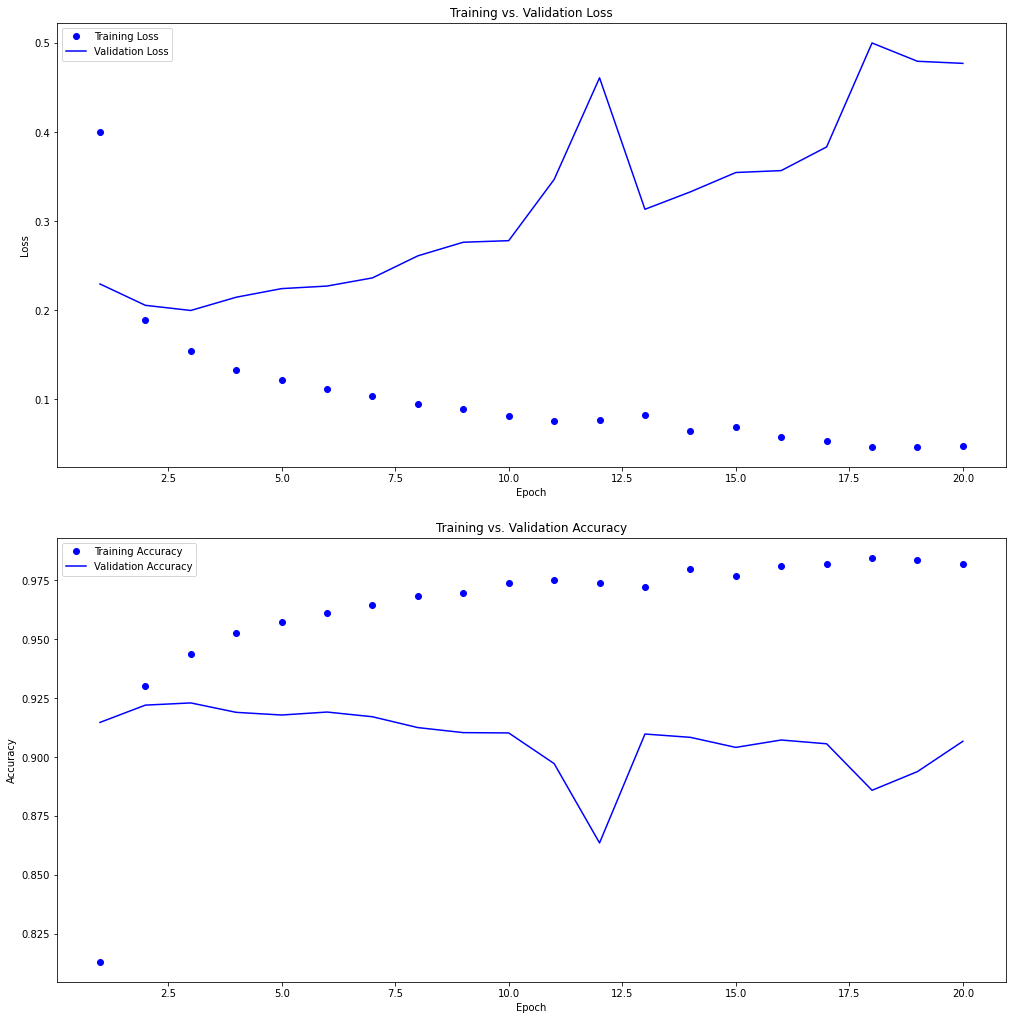

In [58]:
plot_train_vs_val_performance(history)

In [59]:
# Training till epoch 3

embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    input_length=MAX_REVIEW_LEN,
    trainable=True
)

model = keras.Sequential()
model.add(embedding_layer)
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/3
167/167 [==============================] - 67s 394ms/step - loss: 0.3617 - accuracy: 0.8389 - val_loss: 0.2219 - val_accuracy: 0.9169
Epoch 2/3
167/167 [==============================] - 65s 392ms/step - loss: 0.1822 - accuracy: 0.9325 - val_loss: 0.2034 - val_accuracy: 0.9223
Epoch 3/3
167/167 [==============================] - 64s 382ms/step - loss: 0.1482 - accuracy: 0.9453 - val_loss: 0.1980 - val_accuracy: 0.9234


In [60]:
yelp_test = pd.read_csv('./data/yelp_review_polarity_csv/test.csv', names=['sentiment', 'review'])

In [61]:
yelp_test['sentiment'].replace(to_replace=1, value=0, inplace=True)
yelp_test['sentiment'].replace(to_replace=2, value=1, inplace=True)
yelp_test.head()

,sentiment,review
0,1,"Contrary to other reviews, I have zero complai..."
1,0,Last summer I had an appointment to get new ti...
2,1,"Friendly staff, same starbucks fair you get an..."
3,0,The food is good. Unfortunately the service is...
4,1,Even when we didn't have a car Filene's Baseme...


In [62]:
y_test = np.array(yelp_test['sentiment'])
print(y_test)

[1 0 1 ... 0 0 0]


In [63]:
X_test = tokenizer.texts_to_sequences(yelp_test['review'])

In [64]:
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=MAX_REVIEW_LEN)

In [65]:
model.evaluate(X_test, y_test)

1188/1188 [==============================] - 5s 5ms/step - loss: 0.1876 - accuracy: 0.9291


[0.187555730342865, 0.9291315674781799]

In [66]:
def sentiment(reviews):
  seqs = tokenizer.texts_to_sequences(reviews)
  seqs = keras.preprocessing.sequence.pad_sequences(seqs, maxlen=MAX_REVIEW_LEN)
  return model.predict(seqs)

In [67]:
pos_review = "The best seafood joint in East Village San Diego!  Great lobster roll, great fish, great oysters, great bread, great cocktails, and such amazing service.  The atmosphere is top notch and the location is so much fun being located just a block away from Petco Park (San Diego Padres Stadium)."
neg_review = "A thoroughly disappointing experience. When you book a Marriott you expect a certain standard. Albany falls way short. Room cleaning has to be booked 24 hours in advance but nobody thought to mention this at check in. The hotel is tired and needs a face-lift. The only bright light in a sea of mediocrity were the pancakes at breakfast. Sadly they weren't enough to save the experience. If you travel to Albany, then do yourself a big favour and book the Westin."

In [68]:
print(sentiment([pos_review, neg_review]))

1/1 [==============================] - 0s 97ms/step
[[0.99970126]
 [0.00714538]]


## Not using pre-trained embeddings

In [69]:
tf.random.set_seed(0)

model = keras.Sequential()

# The 'trainable' property is True by default.
model.add(layers.Embedding(input_dim=num_tokens, 
                           output_dim=embedding_dim, 
                           input_length=MAX_REVIEW_LEN))


model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.random_normal(seed=1)))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val), callbacks=[es_callback])

Epoch 1/20
167/167 [==============================] - 66s 389ms/step - loss: 0.4294 - accuracy: 0.7795 - val_loss: 0.2252 - val_accuracy: 0.9139
Epoch 2/20
167/167 [==============================] - 65s 387ms/step - loss: 0.1847 - accuracy: 0.9304 - val_loss: 0.2103 - val_accuracy: 0.9166
Epoch 3/20
167/167 [==============================] - 65s 389ms/step - loss: 0.1502 - accuracy: 0.9457 - val_loss: 0.2029 - val_accuracy: 0.9215
Epoch 4/20
167/167 [==============================] - 66s 395ms/step - loss: 0.1312 - accuracy: 0.9534 - val_loss: 0.2126 - val_accuracy: 0.9204
Epoch 5/20
167/167 [==============================] - 67s 400ms/step - loss: 0.1199 - accuracy: 0.9583 - val_loss: 0.2254 - val_accuracy: 0.9169
Epoch 6/20
167/167 [==============================] - 67s 403ms/step - loss: 0.1101 - accuracy: 0.9619 - val_loss: 0.2313 - val_accuracy: 0.9187


In [70]:
model.evaluate(X_test, y_test)

1188/1188 [==============================] - 6s 5ms/step - loss: 0.2170 - accuracy: 0.9216


[0.21700069308280945, 0.9215526580810547]

In [71]:
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    input_length=MAX_REVIEW_LEN,
    trainable=False
)

model = keras.Sequential()
model.add(embedding_layer)
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
167/167 [==============================] - 9s 49ms/step - loss: 0.4895 - accuracy: 0.7720 - val_loss: 0.3610 - val_accuracy: 0.8630
Epoch 2/20
167/167 [==============================] - 8s 48ms/step - loss: 0.3312 - accuracy: 0.8707 - val_loss: 0.3488 - val_accuracy: 0.8682
Epoch 3/20
167/167 [==============================] - 8s 48ms/step - loss: 0.3128 - accuracy: 0.8767 - val_loss: 0.3153 - val_accuracy: 0.8790
Epoch 4/20
167/167 [==============================] - 8s 48ms/step - loss: 0.2997 - accuracy: 0.8809 - val_loss: 0.3684 - val_accuracy: 0.8575
Epoch 5/20
167/167 [==============================] - 8s 48ms/step - loss: 0.2970 - accuracy: 0.8808 - val_loss: 0.3076 - val_accuracy: 0.8752
Epoch 6/20
167/167 [==============================] - 8s 48ms/step - loss: 0.2902 - accuracy: 0.8830 - val_loss: 0.3064 - val_accuracy: 0.8782
Epoch 7/20
167/167 [==============================] - 8s 48ms/step - loss: 0.2863 - accuracy: 0.8830 - val_loss: 0.2880 - val_accuracy: 0.8815

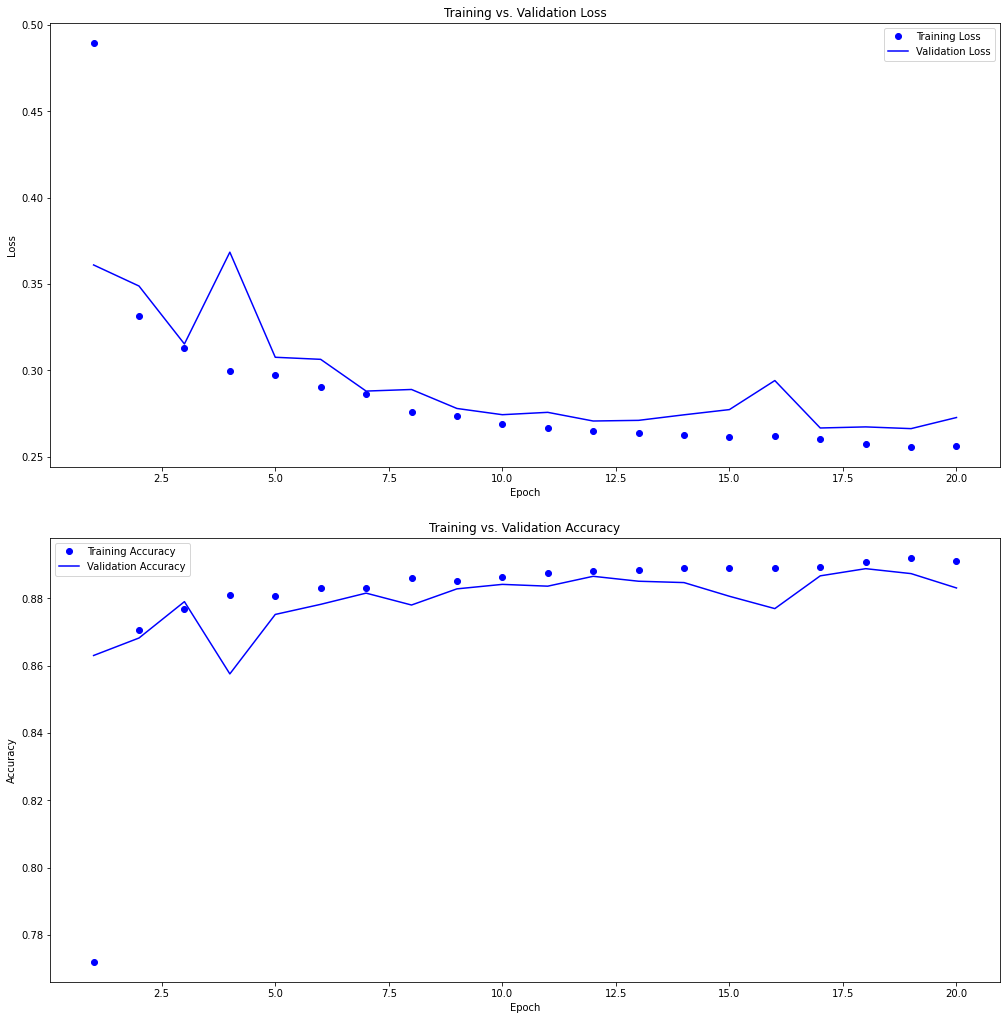

In [72]:
plot_train_vs_val_performance(history)

In [73]:
model.evaluate(X_test, y_test)

1188/1188 [==============================] - 5s 4ms/step - loss: 0.2609 - accuracy: 0.8892


[0.2608715891838074, 0.8892368674278259]